data sourse: https://data.gov.ua/dataset/06779371-308f-42d7-895e-5a39833375f0/resource/01323740-88df-46c2-b06e-fbb58c89fe17

In [1]:
# see first 3 lines of a file without time-memory consuming operations
raw = open('../../Downloads/Транспорт.csv')
next(raw), next(raw), next(raw)
# remember: open(..) returns iterator
# I use this to determine separator

('person;reg_addr_koatuu;oper_code;oper_name;d_reg;dep_code;dep;brand;model;make_year;color;kind;body;purpose;fuel;capacity;own_weight;total_weight;n_reg_new\n',
 'P;1210436900;440;"440 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ВТРАТІ СВIДОЦТВА ПРО РЕЄСТРАЦIЮ";2018-01-01;1244;"ТСЦ 1244";"ВАЗ  2101";2101;1980;БІЛИЙ;ЛЕГКОВИЙ;СЕДАН-B;ЗАГАЛЬНИЙ;БЕНЗИН;1198;955;1355;6485ДПП\n',
 'P;3522855100;540;"540 - ЗНЯТТЯ З ОБЛIКУ У ЗВ`ЯЗКУ З ВИБРАКОВКОЮ";2018-01-03;3541;"ТСЦ 3541";"ЗАЗ  110557";110557;2007;БІЛИЙ;ЛЕГКОВИЙ;ПІКАП-В;ЗАГАЛЬНИЙ;БЕНЗИН;1197;831;1190;NULL\n')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.__version__

'0.23.0'

In [4]:
tr = pd.read_csv('../../Downloads/Транспорт.csv', error_bad_lines=False, sep=';')
tr.head()

,person,reg_addr_koatuu,oper_code,oper_name,d_reg,dep_code,dep,brand,model,make_year,color,kind,body,purpose,fuel,capacity,own_weight,total_weight,n_reg_new
0,P,1.210437e+09,440,440 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ВТРАТІ СВIДОЦТВА ПРО ...,2018-01-01,1244,ТСЦ 1244,ВАЗ 2101,2101,1980,БІЛИЙ,ЛЕГКОВИЙ,СЕДАН-B,ЗАГАЛЬНИЙ,БЕНЗИН,1198.0,955.0,1355.0,6485ДПП
1,P,3.522855e+09,540,540 - ЗНЯТТЯ З ОБЛIКУ У ЗВ`ЯЗКУ З ВИБРАКОВКОЮ,2018-01-03,3541,ТСЦ 3541,ЗАЗ 110557,110557,2007,БІЛИЙ,ЛЕГКОВИЙ,ПІКАП-В,ЗАГАЛЬНИЙ,БЕНЗИН,1197.0,831.0,1190.0,NaN
2,P,7.120982e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-03,7142,ТСЦ 7142,MAZDA 3,3,2006,СІРИЙ,ЛЕГКОВИЙ,СЕДАН-B,ЗАГАЛЬНИЙ,БЕНЗИН,1598.0,1200.0,1830.0,СА9073СА
3,P,2.124487e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-03,2142,ТСЦ 2142,MERCEDES-BENZ E 220 CDI,E 220 CDI,2011,ЧОРНИЙ,ЛЕГКОВИЙ,СЕДАН-B,ЗАГАЛЬНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,2143.0,1615.0,2090.0,АО7474ВО
4,P,7.123410e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-03,7142,ТСЦ 7142,БОГДАН 211140,211140,2014,ЧОРНИЙ,ЛЕГКОВИЙ,УНІВЕРСАЛ-B,ЗАГАЛЬНИЙ,БЕНЗИН АБО ГАЗ,1596.0,1110.0,1580.0,СА1806СВ


In [5]:
print( "num of fields: {1}, num of records: {0}".format(*tr.shape),"\nnum of cells:", tr.size,)

num of fields: 19, num of records: 1022724 
num of cells: 19431756


In [6]:
import numpy as np


In [7]:
colors = np.array(tr['color'].values)

In [8]:
colors[:10] # see first 10 colors

array(['БІЛИЙ', 'БІЛИЙ', 'СІРИЙ', 'ЧОРНИЙ', 'ЧОРНИЙ', 'СІРИЙ', 'ЧЕРВОНИЙ',
       'БІЛИЙ', 'СІРИЙ', 'БІЛИЙ'], dtype=object)

In [9]:
np.setdiff1d(colors,[]) # unique elements = unique colors

array(['БІЛИЙ', 'БЕЖЕВИЙ', 'ЖОВТИЙ', 'ЗЕЛЕНИЙ', 'КОРИЧНЕВИЙ',
       'НЕВИЗНАЧЕНИЙ', 'ОРАНЖЕВИЙ', 'СІРИЙ', 'СИНІЙ', 'ФІОЛЕТОВИЙ',
       'ЧЕРВОНИЙ', 'ЧОРНИЙ'], dtype=object)

In [10]:
years = tr['make_year'].values

In [11]:
2018 - np.min(years) # the oldest car is yo

118

In [12]:
tr.dtypes

person              object
reg_addr_koatuu    float64
oper_code            int64
oper_name           object
d_reg               object
dep_code             int64
dep                 object
brand               object
model               object
make_year            int64
color               object
kind                object
body                object
purpose             object
fuel                object
capacity           float64
own_weight         float64
total_weight       float64
n_reg_new           object
dtype: object

In [13]:
tr.isnull().sum()

person                 0
reg_addr_koatuu        1
oper_code              0
oper_name              0
d_reg                  0
dep_code               0
dep                    0
brand                  0
model                  0
make_year              0
color                  0
kind                   0
body                   0
purpose                0
fuel               60659
capacity           65911
own_weight            43
total_weight           4
n_reg_new           9240
dtype: int64

In [14]:
# count new beige cars
len(tr[tr.color == 'БЕЖЕВИЙ']), 


(35900,)

In [15]:
ops = tr['oper_name']
unique_ops = np.setdiff1d(ops,[]) # unique operation names
ops_count = []
for op in unique_ops:
    ops_count.append([op, len(ops[ops == op])])

In [16]:
ops_count

[['10 - РЕЄСТРАЦIЯ ТЗ ПО АКТУ ПРИЙМАННЯ ПЕРЕДАЧІ(ДОД.2)', 2],
 ['100 - ПЕРВИННА РЕЄСТРАЦIЯ Б/В ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, ЯКИЙ ВВЕЗЕНО З-ЗА КОРДОНУ',
  979],
 ['100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, УСТАНОВИ',
  4],
 ['100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, ЯКИЙ ВВЕЗЕНО З-ЗА КОРДОНУ',
  92485],
 ['101 - РЕЄСТРАЦIЯ ТЗ ЗА ДОГОВОРОМ ЛІЗИНГУ', 3871],
 ['105 - ПЕРВИННА РЕЄСТРАЦІЯ НОВОГО ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, ЯКИЙ ВВЕЗЕНО З-ЗА КОРДОНУ',
  985],
 ['11 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ДЛЯ ІНШИХ ОРГ. ДЕРЖ.ВЛАСНОСТІ', 2],
 ['110 - РЕЄСТРАЦIЯ ТЗ ОТРИМАНОГО ЧЕРЕЗ ВIДДIЛ СОЦ. ЗАХИСТУ', 125],
 ['13 -  ВИПРАВЛЕННЯ VIN-КОДУ (ПІСЛЯ ВИПРАВЛЕННЯ КАРТКУ ВИДАЛИТИ)', 4827],
 ['130 - РЕЄСТРАЦIЯ ТЗ У ЗВ`ЯЗКУ З ПРИЇЗДОМ НА ПМЖ ', 140],
 ["131 - РЕЄСТРАЦІЯ ТЗ У ЗВ'ЯЗКУ З ПРИЇЗДОМ НА ПМП В МЕЖАХ УКРАЇНИ", 2],
 ['140 - ВТОРИННА РЕЄСТРАЦIЯ ТЗ У ЗВ`ЯЗКУ З НЕПРОДАЖЕМ', 714],
 ['141 - РЕЄСТРАЦIЯ ТЗ ПIСЛЯ ВIДМIНИ ЇЇ АНУЛЮВАННЯ', 22],

In [17]:
ops_count_df = pd.DataFrame(ops_count, columns=["op","count"])

In [18]:
ops_count_df.head() 

,op,count
0,10 - РЕЄСТРАЦIЯ ТЗ ПО АКТУ ПРИЙМАННЯ ПЕРЕДАЧІ(...,2
1,100 - ПЕРВИННА РЕЄСТРАЦIЯ Б/В ТЗ ПРИДБАНОГО В ...,979
2,100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГ...,4
3,100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГ...,92485
4,101 - РЕЄСТРАЦIЯ ТЗ ЗА ДОГОВОРОМ ЛІЗИНГУ,3871


In [19]:
# sort agreements by popularity
ops_count_df_sorted = ops_count_df.sort_values('count', ascending=False)
ops_count_df_sorted.head()

,op,count
40,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,261111
34,308 - ПЕРЕРЕЄСТРАЦІЯ НА НОВОГО ВЛАСНИКА ЗА ДОГ...,145530
3,100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГ...,92485
66,400 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ПЕРЕОБЛАДНАННI ДЛЯ РО...,86143
97,530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ,69081


In [20]:
ops_count_df_sorted.values

array([['315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ УКЛАДЕНОМУ В ТСЦ',
        261111],
       ['308 - ПЕРЕРЕЄСТРАЦІЯ НА НОВОГО ВЛАСНИКА ЗА ДОГ. КУПIВЛI-ПРОДАЖУ (СГ)',
        145530],
       ['100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, ЯКИЙ ВВЕЗЕНО З-ЗА КОРДОНУ',
        92485],
       ['400 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ПЕРЕОБЛАДНАННI ДЛЯ РОБОТИ НА ГАЗОВОМУ ПАЛЬНОМУ',
        86143],
       ['530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ', 69081],
       ['172 - ПЕРВИННА РЕЄСТРАЦІЯ ЛЕГКОВИХ ТЗ, ЯКІ ВВЕЗЕНО З-ЗА КОРДОНУ',
        66332],
       ['48 - ВТОРИННА РЕЄСТРАЦІЯ ТЗ ПО ДОГ. КУП.-ПРОД. УКЛАД. В ТСЦ (ПІСЛЯ 530 АБО 531)',
        34019],
       ['40 - ВТОРИННА РЕЄСТРАЦІЯ ТЗ, ПРИДБАНОГО В ТОРГОВЕЛЬНІЙ ОРГАНІЗАЦІЇ',
        31813],
       ['440 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ВТРАТІ СВIДОЦТВА ПРО РЕЄСТРАЦIЮ',
        24689],
       ['69 - РЕЄСТРАЦІЯ ТЗ ПО АКТУ ПРИЙОМУ-ПЕРЕДАЧІ', 16214],
       ['340 - ПЕРЕРЕЄСТРАЦIЯ У ЗВ`ЯЗКУ ЗI ЗМIНОЮ АНКЕТНИХ ДАНИХ ВЛАСНИКА',
        14875],


array([261111, 145530,  92485,  86143,  69081,  66332,  34019,  31813,
        24689,  16214,  14875,  14020,  13694,  12566,  12129,  11860,
        11416,   9873,   9261,   9098,   7503,   6501,   6432,   5601,
         4827,   4356,   4287,   3944,   3871,   3757,   2207,   1832,
         1712,   1629,   1500,   1408,   1108,   1007,    985,    979,
          750,    714,    635,    609,    597,    566,    556,    516,
          513,    497,    403,    401,    336,    277,    238,    232,
          208,    205,    196,    190,    177,    164,    140,    126,
          125,    117,     98,     95,     86,     82,     80,     78,
           73,     67,     64,     62,     59,     59,     51,     50,
           46,     43,     41,     34,     34,     31,     31,     31,
           30,     29,     24,     22,     22,     20,     17,     15,
           14,     12,     12,      8,      7,      7,      5,      4,
            3,      3,      3,      3,      3,      3,      2,      2,
      

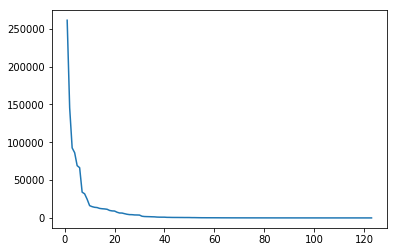

In [135]:
counts = ops_count_df_sorted['count'].values
index_num = np.arange(1,len(ops_count_df_sorted)+1)
plt.plot(index_num, counts) # type of agrement and number of agrements distribution
# Distribution poison or y = X/a+bX?
# X - index number of a type in th sorted array
# y - number of records for a type with index X
# apply linear regression for
X = index_num
y = np.array(counts)
y

(array([], dtype=int64),)


(array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667,
        0.0625    , 0.05882353, 0.05555556, 0.05263158, 0.05      ,
        0.04761905, 0.04545455, 0.04347826, 0.04166667, 0.04      ,
        0.03846154, 0.03703704, 0.03571429, 0.03448276, 0.03333333,
        0.03225806, 0.03125   , 0.03030303, 0.02941176, 0.02857143,
        0.02777778, 0.02702703, 0.02631579, 0.02564103, 0.025     ,
        0.02439024, 0.02380952, 0.02325581, 0.02272727, 0.02222222,
        0.02173913, 0.0212766 , 0.02083333, 0.02040816, 0.02      ,
        0.01960784, 0.01923077, 0.01886792, 0.01851852, 0.01818182,
        0.01785714, 0.01754386, 0.01724138, 0.01694915, 0.01666667,
        0.01639344, 0.01612903, 0.01587302, 0.015625  , 0.01538462,
        0.01515152, 0.01492537, 0.01470588, 0.01449275, 0.01428571,
        0.01408451, 0.01388889, 0.01369863, 0.01

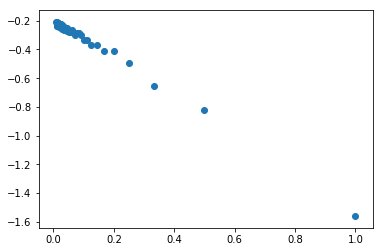

In [186]:
# 1/y = b + a*1/X <=> y' = b + aX', where y'=1/y and X'=1/X
# we should remove all zero counts

index_0 = np.where(X == 0) # I needed that to figure out where I will divide by 0
print(index_0) # empty array
y_r = 1./y
X_r = 1./X
plt.scatter(X_r, y_r)
# estimate values a and b:

X_r, y_r, X*X_r, y*y_r # check

In [136]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_r[:,None], y_r[:,None])
print("Coefs:\n", regr.coef_)
print("intercept:\n", regr.intercept_)

Coefs:
 [[-0.33638023]]
intercept:
 [0.12462553]


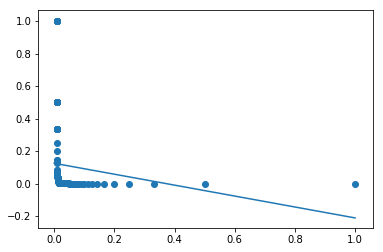

In [143]:
prediction = lambda X: regr.intercept_ + (X * regr.coef_)
X1 = np.arange(0,2)
plt.plot(X1, prediction(X1)[0])
plt.scatter(X_r, y_r)

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.207e+02, 1.208e+02,
       1.209e+02])

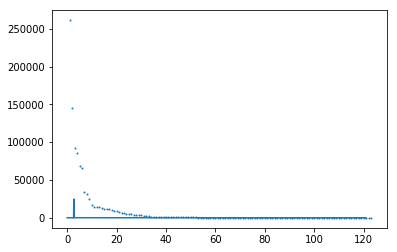

In [145]:
# thus
b = regr.intercept_
a = regr.coef_
Xest = np.arange(0,121,0.1)
yest = Xest/(a+b*X2)[0]
plt.plot(Xest, yest)
plt.scatter(index_num, counts, s=1) # type of agrement and number of agrements distribution

Xest

In [33]:
rereg = '100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, ЯКИЙ ВВЕЗЕНО З-ЗА КОРДОНУ'

In [34]:
index_rereg = np.where(tr['oper_name']==rereg)[0]

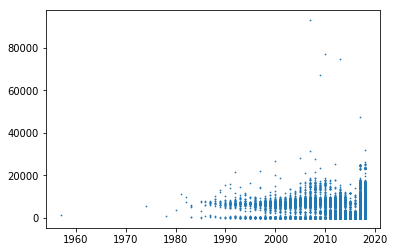

In [40]:
plt.scatter(tr['make_year'].values[index_rereg], tr['own_weight'].values[index_rereg], s=0.5)

TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [218]:
X = np.arange(1, 101)
eps = np.random.rand(100)/2
import random
y = X/(-1 - 0.2*X) + eps

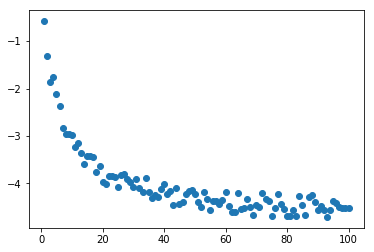

In [219]:
plt.scatter(X, y)

(array([], dtype=int64),)


(array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667,
        0.0625    , 0.05882353, 0.05555556, 0.05263158, 0.05      ,
        0.04761905, 0.04545455, 0.04347826, 0.04166667, 0.04      ,
        0.03846154, 0.03703704, 0.03571429, 0.03448276, 0.03333333,
        0.03225806, 0.03125   , 0.03030303, 0.02941176, 0.02857143,
        0.02777778, 0.02702703, 0.02631579, 0.02564103, 0.025     ,
        0.02439024, 0.02380952, 0.02325581, 0.02272727, 0.02222222,
        0.02173913, 0.0212766 , 0.02083333, 0.02040816, 0.02      ,
        0.01960784, 0.01923077, 0.01886792, 0.01851852, 0.01818182,
        0.01785714, 0.01754386, 0.01724138, 0.01694915, 0.01666667,
        0.01639344, 0.01612903, 0.01587302, 0.015625  , 0.01538462,
        0.01515152, 0.01492537, 0.01470588, 0.01449275, 0.01428571,
        0.01408451, 0.01388889, 0.01369863, 0.01

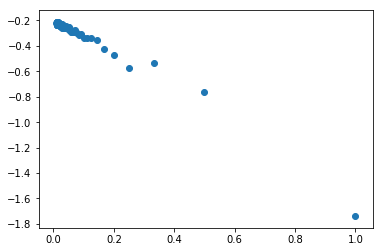

In [220]:
# 1/y = b + a*1/X <=> y' = b + aX', where y'=1/y and X'=1/X
# we should remove all zero counts

index_0 = np.where(X == 0) # I needed that to figure out where I will divide by 0
print(index_0) # empty array
y_r = 1./y
X_r = 1./X
plt.scatter(X_r, y_r)
# estimate values a and b:

X_r, y_r, X*X_r, y*y_r # check

Coefs:
 [[-1.41084142]]
intercept:
 [-0.19997571]


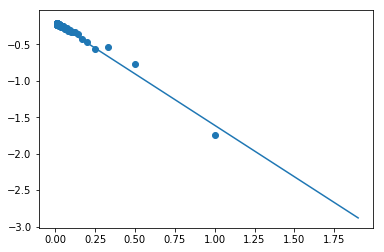

In [221]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_r[:,None], y_r[:,None])
print("Coefs:\n", regr.coef_)
print("intercept:\n", regr.intercept_)

# thus
b = regr.intercept_
a = regr.coef_
# Xest = np.arange(0,2,0.1)

prediction = lambda X: regr.intercept_ + (X * regr.coef_)
plt.plot(Xest, prediction(Xest)[0])
plt.scatter(X_r, y_r)

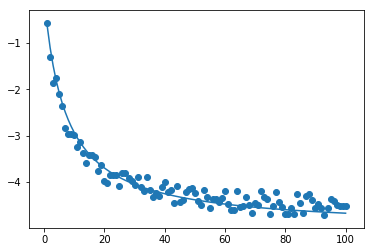

In [222]:
# thus
Xest = np.arange(1, 101)
yest = X/(a+b*X)[0]
plt.plot(Xest,yest)

plt.scatter(X,y)